In [1]:
#Coding a simulation of the game

from random import sample

def stringsgame(n):
    strings=[[2*i,2*i+1] for i in range(n)] #Make a list of pairs to represent our ends
    loops=[] #We start with no loops
    while strings:
        end1,end2=sample(list(range(2*len(strings))),2) #Choosing two ends from the number of ends we have left
        if abs(end1-end2)==1 and min(end1,end2)%2==0: #If the samples are of the same string
            loops.append(strings.pop(end1//2))
        else: #if the samples are of a different string
            if end1%2==1: #if the first sample is on the right of the string
                if end2%2==0: #if the second sample is on the left of the string
                    strings.append(strings[end1//2]+strings[end2//2]) #tie the ends together to make a new string and add to strings
                else: #if the second sample is on the right
                    strings.append(strings[end1//2]+strings[end2//2][::-1]) #flip the second string and tie them together then add new string to strings
            else: #if the first sample is on the left of a string
                if end2%2==1: #if the second sample is on the right
                    strings.append(strings[end2//2]+strings[end1//2]) #move the first string to the second string and tie
                else: #if the second sample is on the left
                    strings.append(strings[end2//2]+strings[end1//2][::-1]) #flip the first string and tie
            strings.pop(max(end1,end2)//2) #Remove the two old strings in the correct order
            strings.pop(min(end1,end2)//2)
    return loops

In [2]:
#Calculating the expected value

def expectedValue(n,reps=1000):
    c=0
    for i in range(reps):
        c+=len(stringsgame(n))
    return c/reps

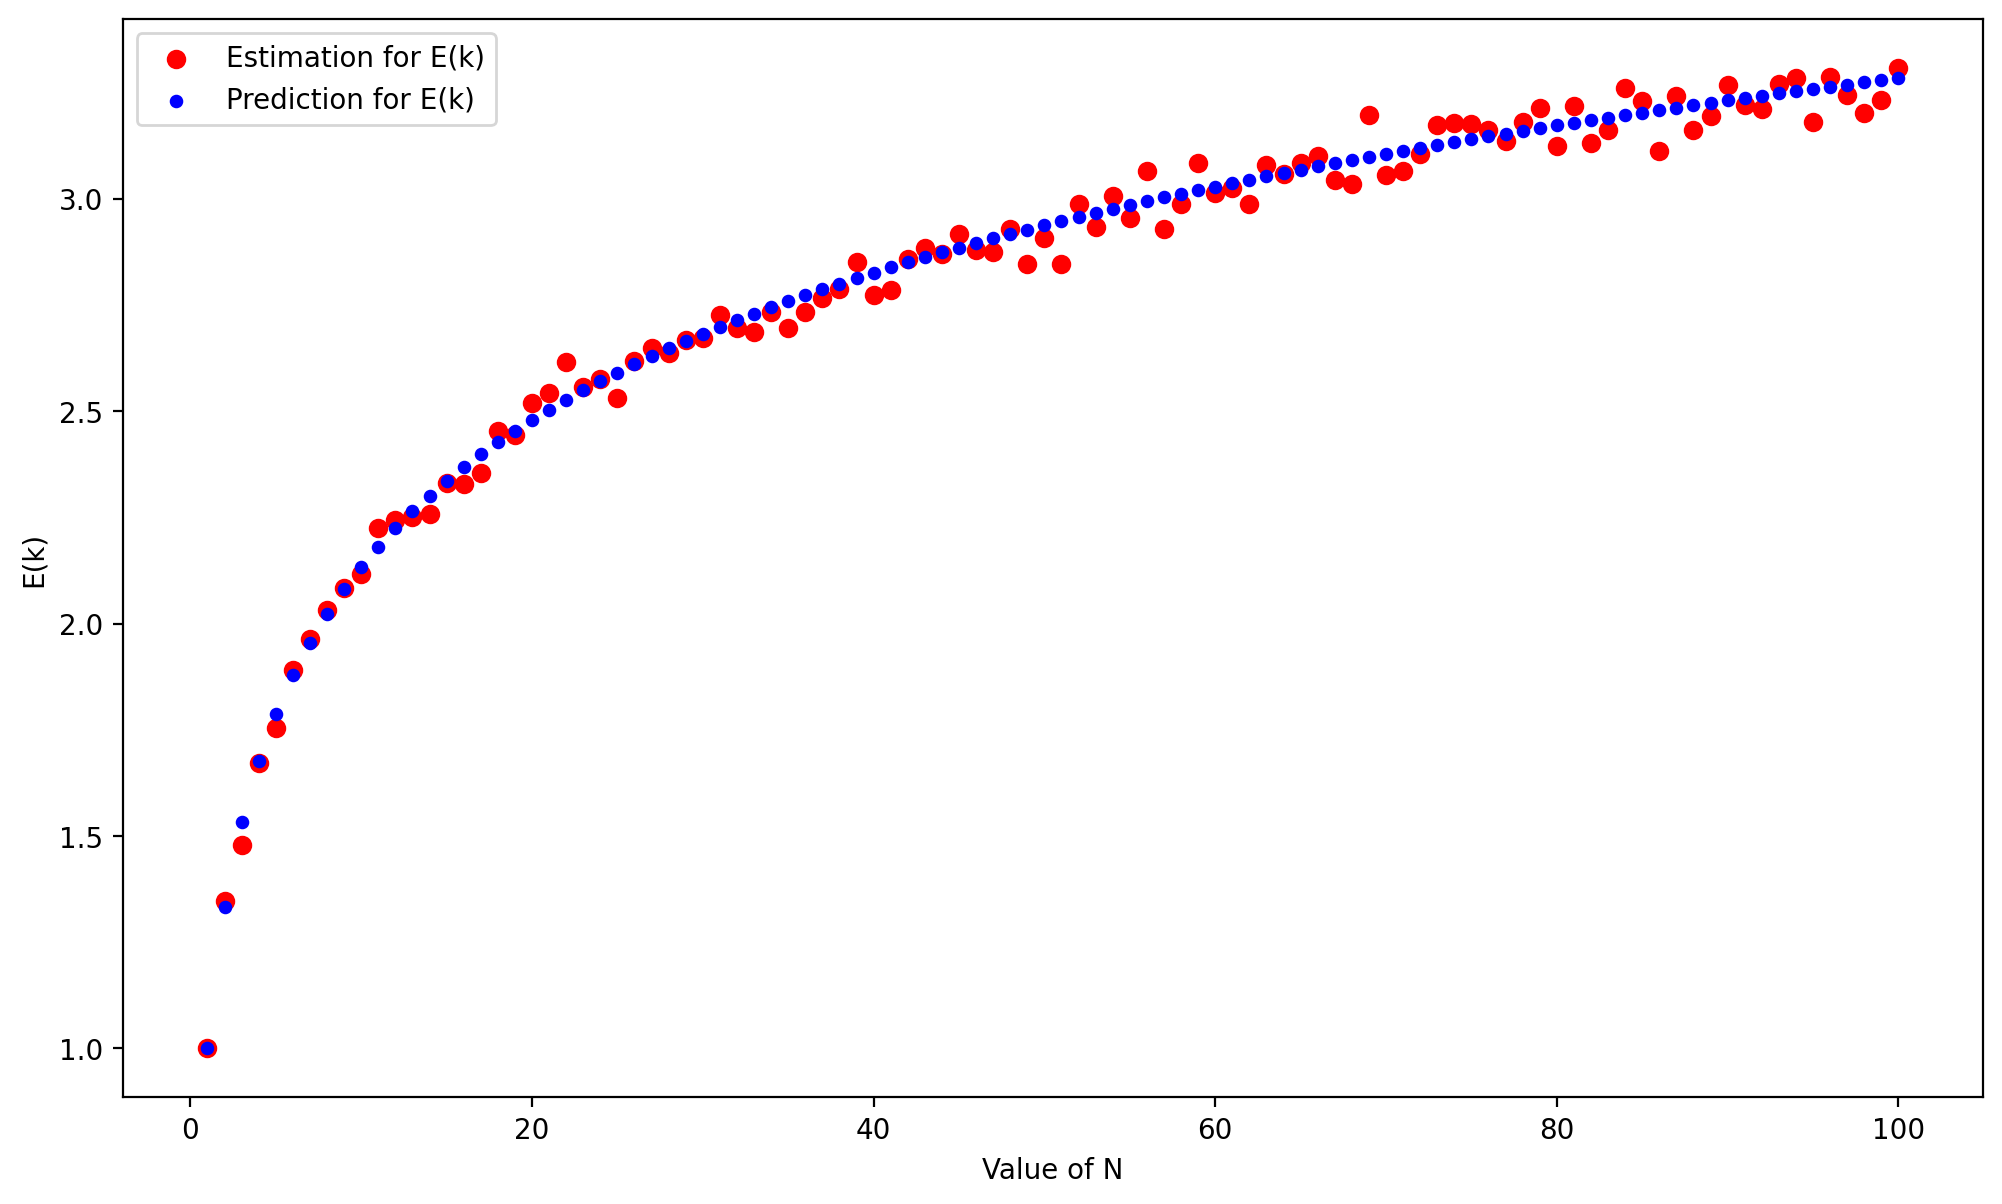

In [3]:
#Producing a graph with our predicted expected value

const=0.98175501301 # euler-mascheroni constant / 2 + ln(2)
from math import log

from matplotlib import pyplot as plt
def expectedValueGraph(mxvl=1000):
    n=list(range(1,mxvl+1))
    evs=[] #list of expected values
    pred=[] #list of predicted values
    H=[0] #initial condition for the Harmonic Numbers
    for i in n:
        evs.append(expectedValue(i,1000))
    for i in range(1,2*mxvl+1): #Creating a list for the k-th harmonic number
        H.append(H[-1]+1/i) 
    for i in n:
        pred.append(H[2*i]-H[i]/2) #Our conjectured expected value
    plt.scatter(n,evs,color='r')
    plt.scatter(n,pred,color='b',s=15)
    plt.legend(['Estimation for E(k)','Prediction for E(k)'])
    plt.xlabel('Value of N')
    plt.ylabel('E(k)')
    plt.show()

expectedValueGraph(100)


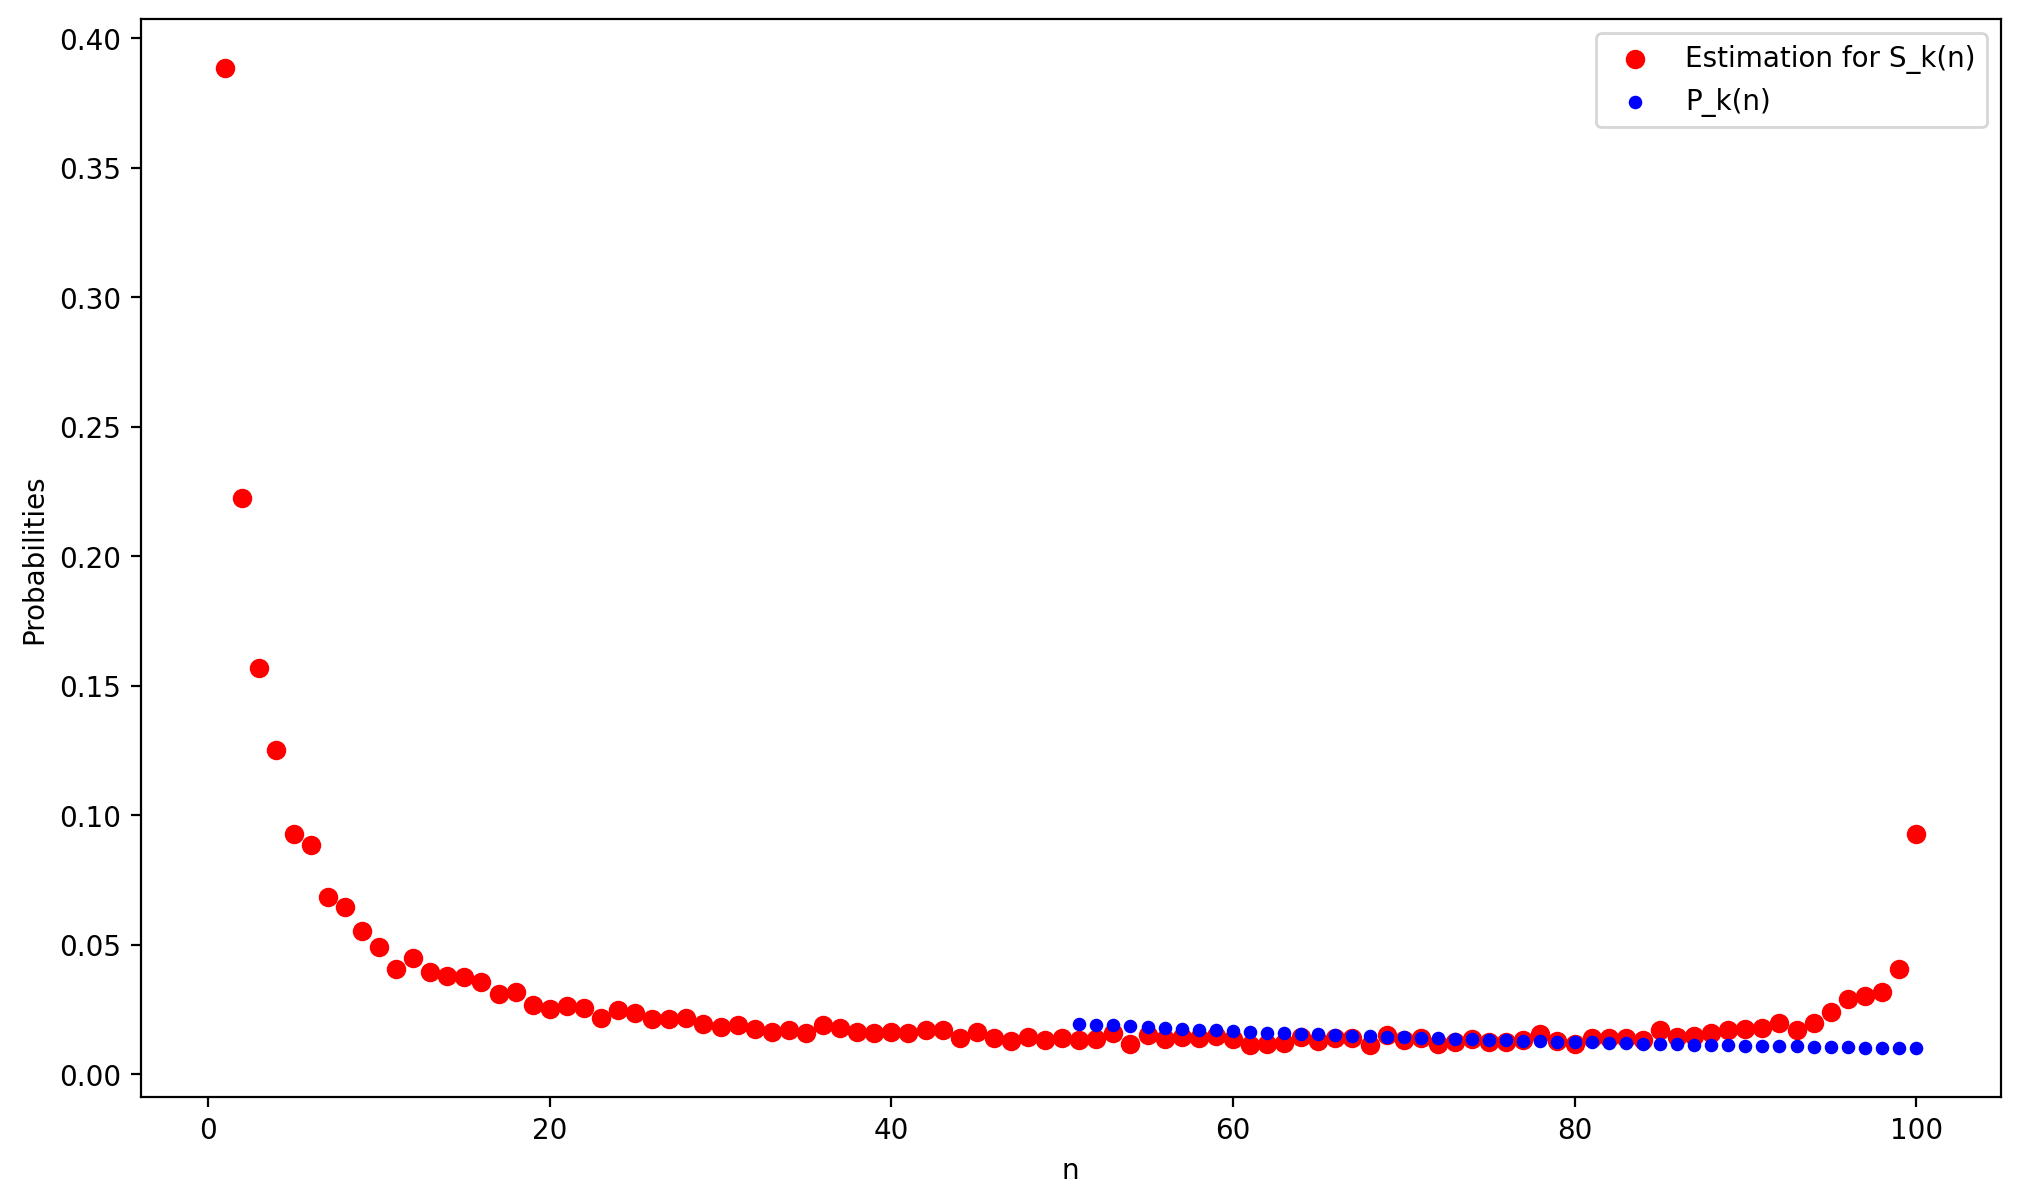

In [7]:
#Our first prediction for S_k(n)

def probofgettingloops(n,reps=1000): #Probability of there being at least one loop of length n
    totals=[0 for i in range(n+1)]
    pred=[1/i for i in range(n//2+1,n+1)]
    for i in range(reps):
        loops=stringsgame(n)
        looplens=set([len(loop) for loop in loops]) #get loop lengths without repeats
        for l in looplens:
            totals[l//2]+=1/reps
    plt.scatter(list(range(n+1)[1:]),totals[1:],color='r')
    plt.scatter(list(range(n//2+1,n+1)),pred,color='b',s=15)
    plt.legend(['Estimation for S_k(n)','P_k(n)'])
    plt.xlabel('n')
    plt.ylabel('Probabilities')
    plt.show()

probofgettingloops(100,10000)

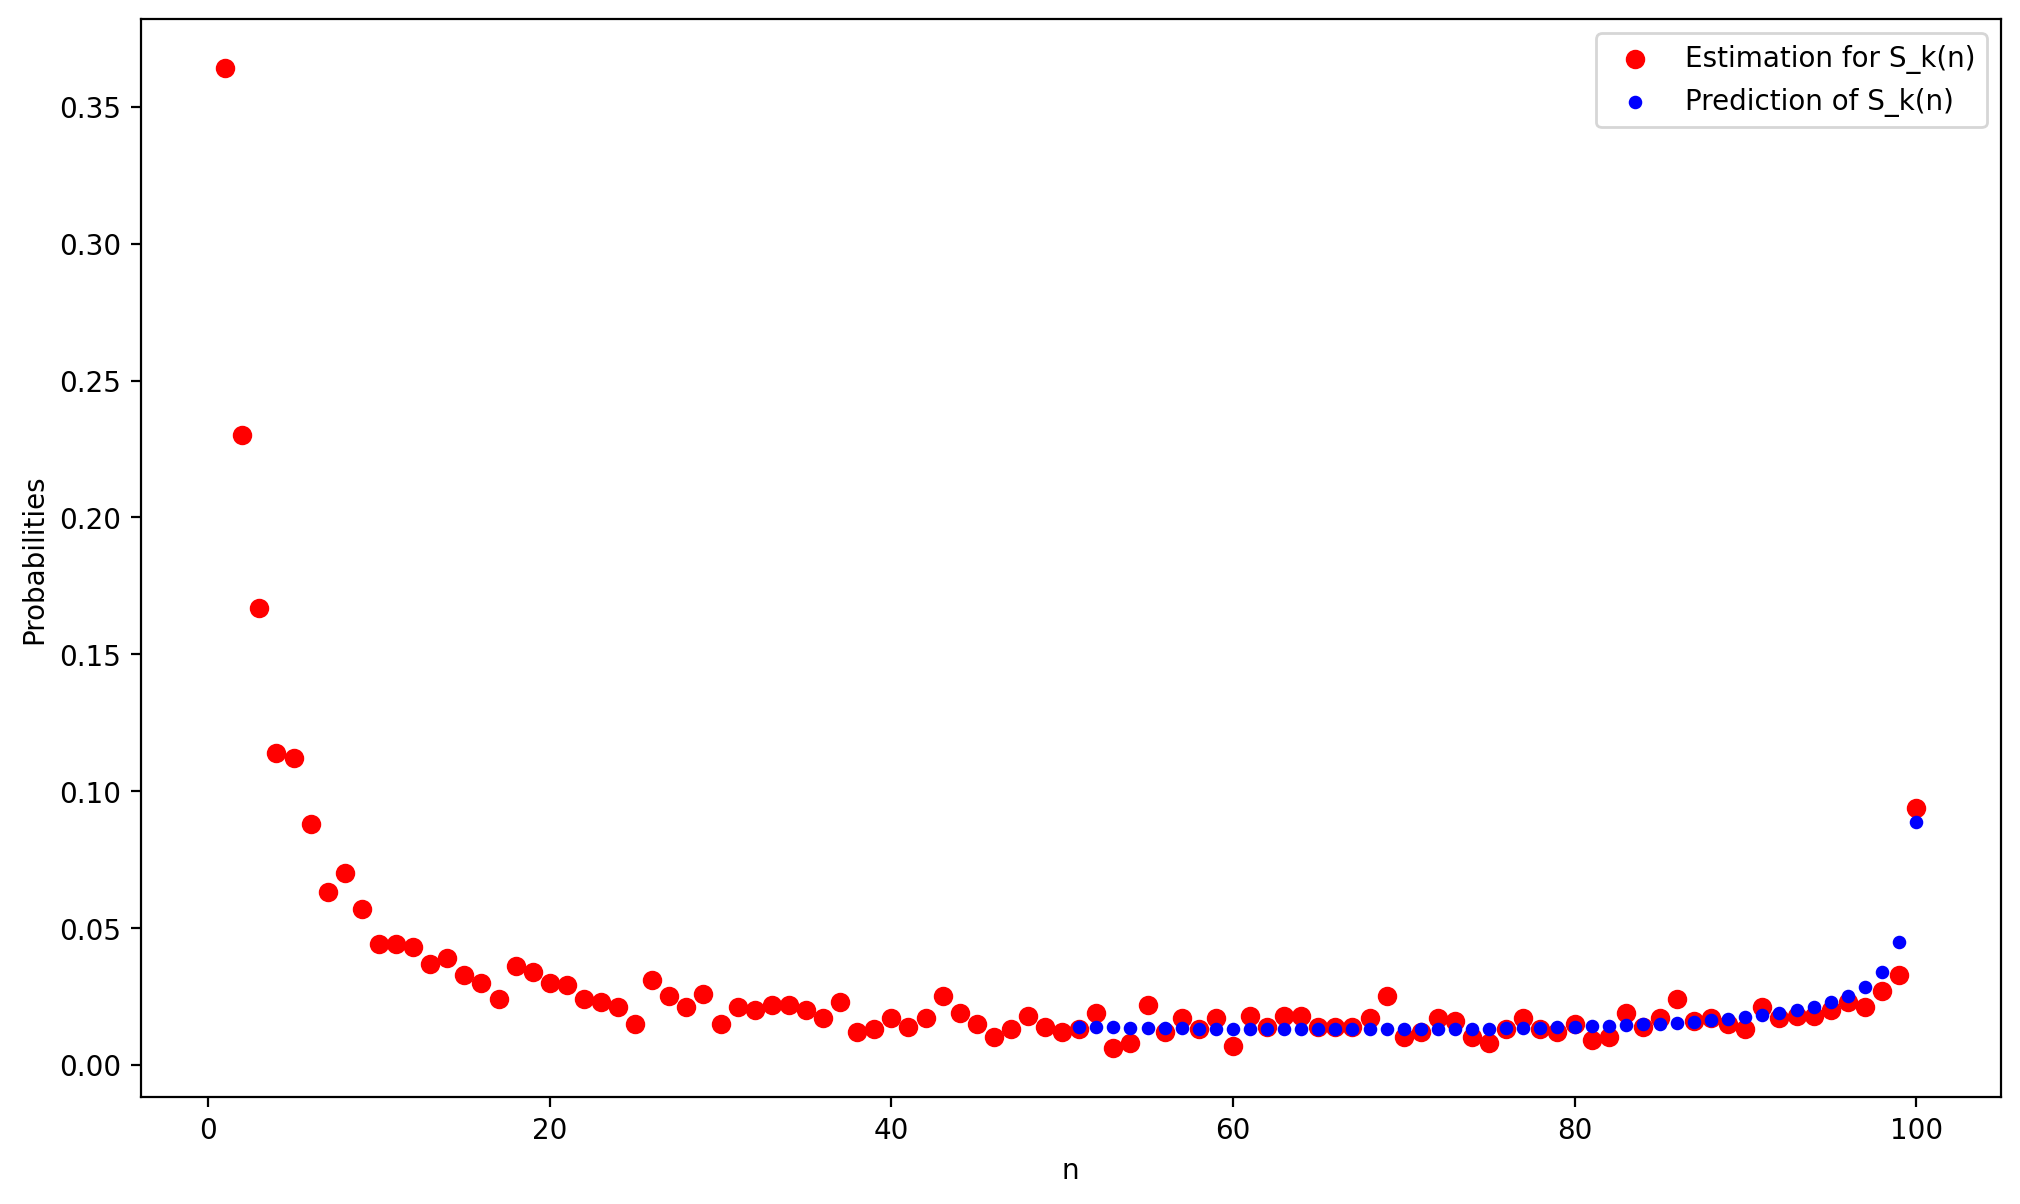

In [4]:
#Second prediction graph

from math import factorial as f
def binom(n,r):
    return f(n)//f(r)//f(n-r)

def probofgettingloopsnewpred(n,reps=1000): #Probability of there being at least one loop of length n
    totals=[0 for i in range(n+1)]
    pred=[2**(2*i-1)*binom(2*n-2*i,n-i)/(i*binom(2*n,n)) for i in range(n//2+1,n+1)]
    for i in range(reps):
        loops=stringsgame(n)
        looplens=set([len(loop) for loop in loops]) #get loop lengths without repeats
        for l in looplens:
            totals[l//2]+=1/reps
    plt.scatter(list(range(n+1)[1:]),totals[1:],color='r')
    plt.scatter(list(range(n//2+1,n+1)),pred,color='b',s=15)
    plt.legend(['Estimation for S_k(n)','Prediction of S_k(n)'])
    plt.xlabel('n')
    plt.ylabel('Probabilities')
    plt.show()

probofgettingloopsnewpred(100,1000)

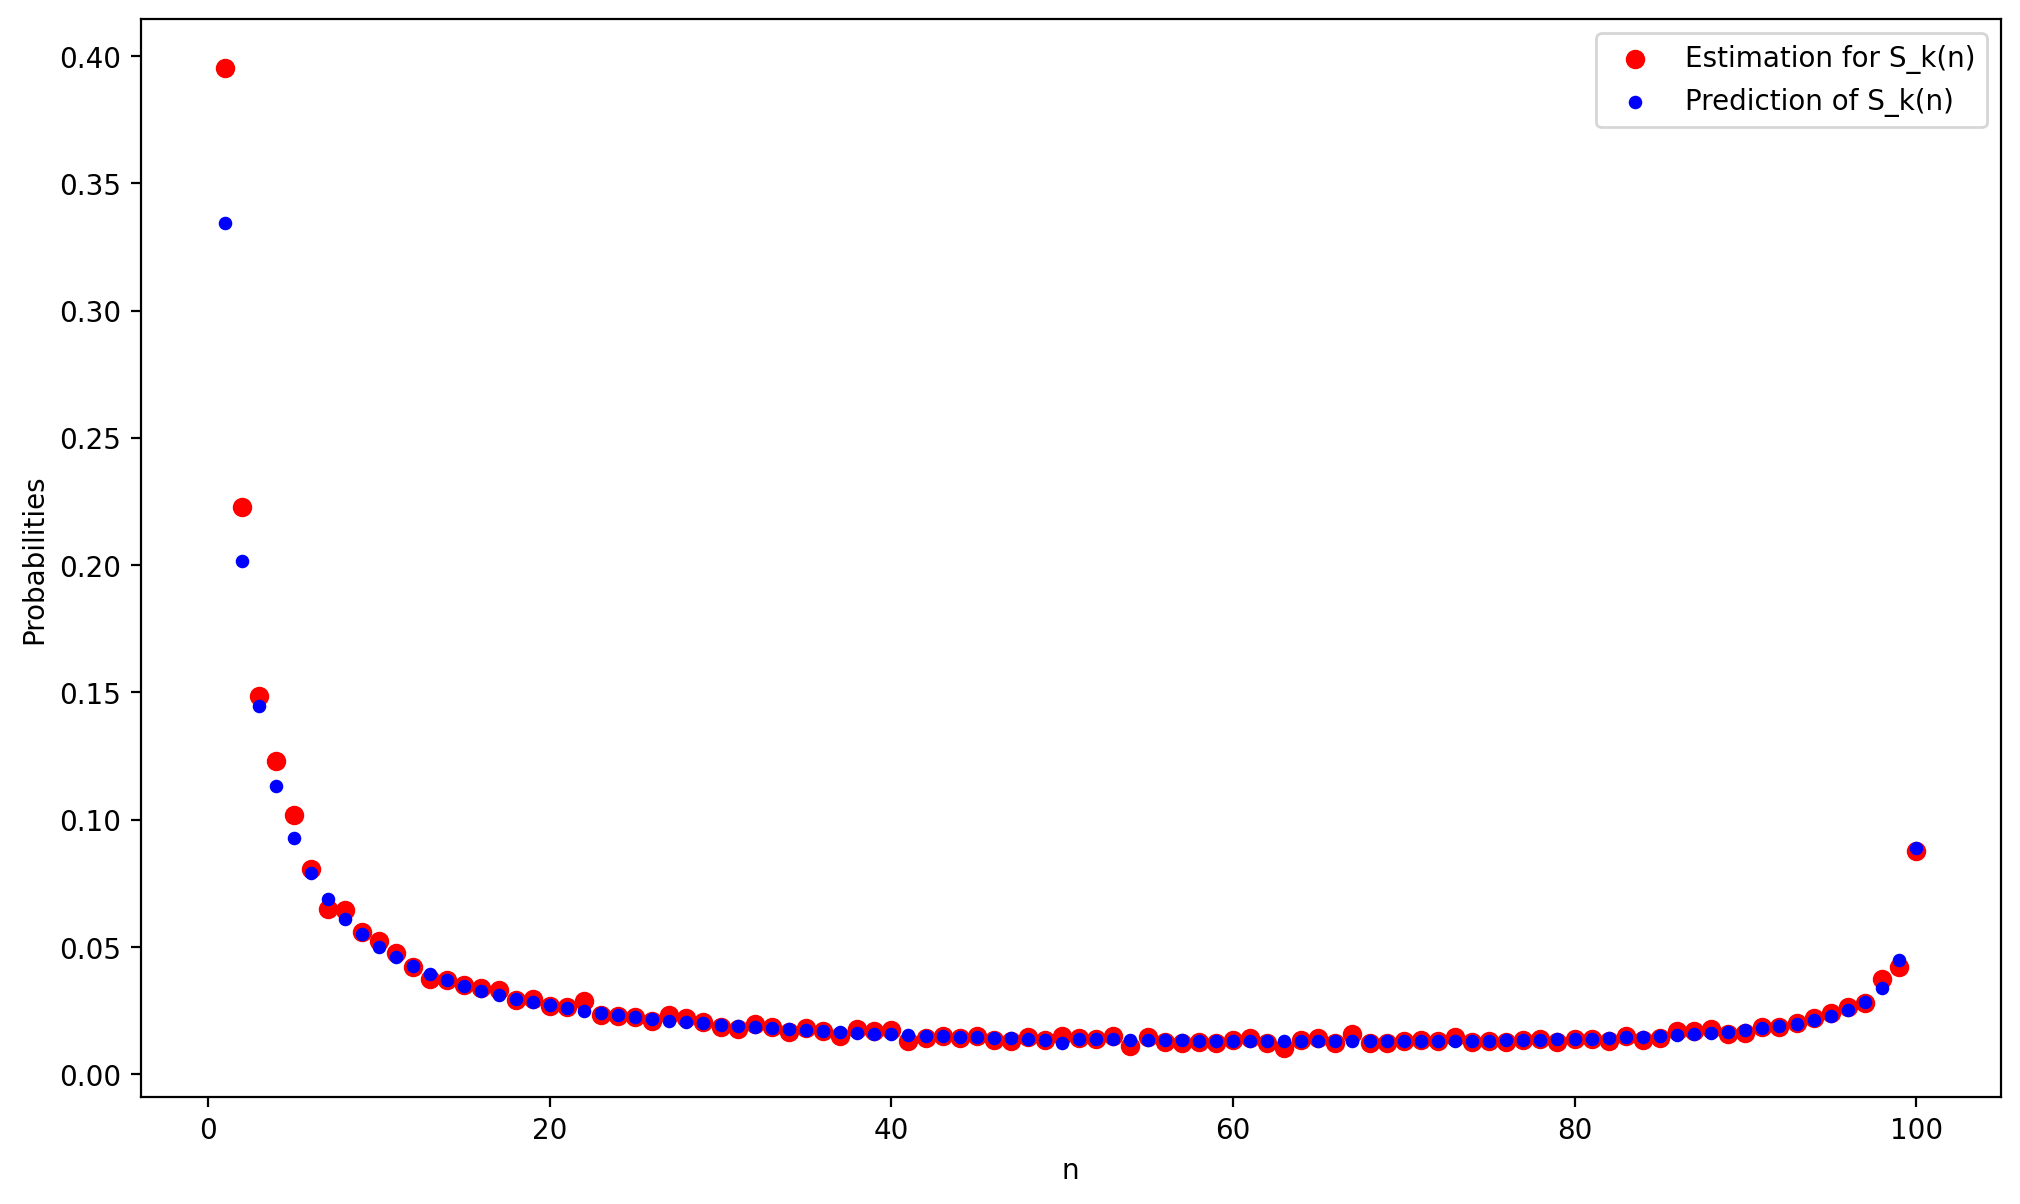

In [9]:
#third prediction graph

def S(k,n):
    if 2*n>k:
        return 2**(2*n-1)*binom(2*k-2*n,k-n)/(binom(2*k,k)*n)
    return 2**(2*n-1)*binom(2*k-2*n,k-n)/(binom(2*k,k)*n)*(1-S(k-n,n))

def probofgettingloopsnewpredfull(n,reps=1000): #Probability of there being at least one loop of length n
    totals=[0 for i in range(n+1)]
    pred=[S(n,i) for i in range(1,n+1)]
    for i in range(reps):
        loops=stringsgame(n)
        looplens=set([len(loop) for loop in loops]) #get loop lengths without repeats
        for l in looplens:
            totals[l//2]+=1/reps
    plt.scatter(list(range(n+1)[1:]),totals[1:],color='r')
    plt.scatter(list(range(1,n+1)),pred,color='b',s=15)
    plt.legend(['Estimation for S_k(n)','Prediction of S_k(n)'])
    plt.xlabel('n')
    plt.ylabel('Probabilities')
    plt.show()

probofgettingloopsnewpredfull(100,10000)

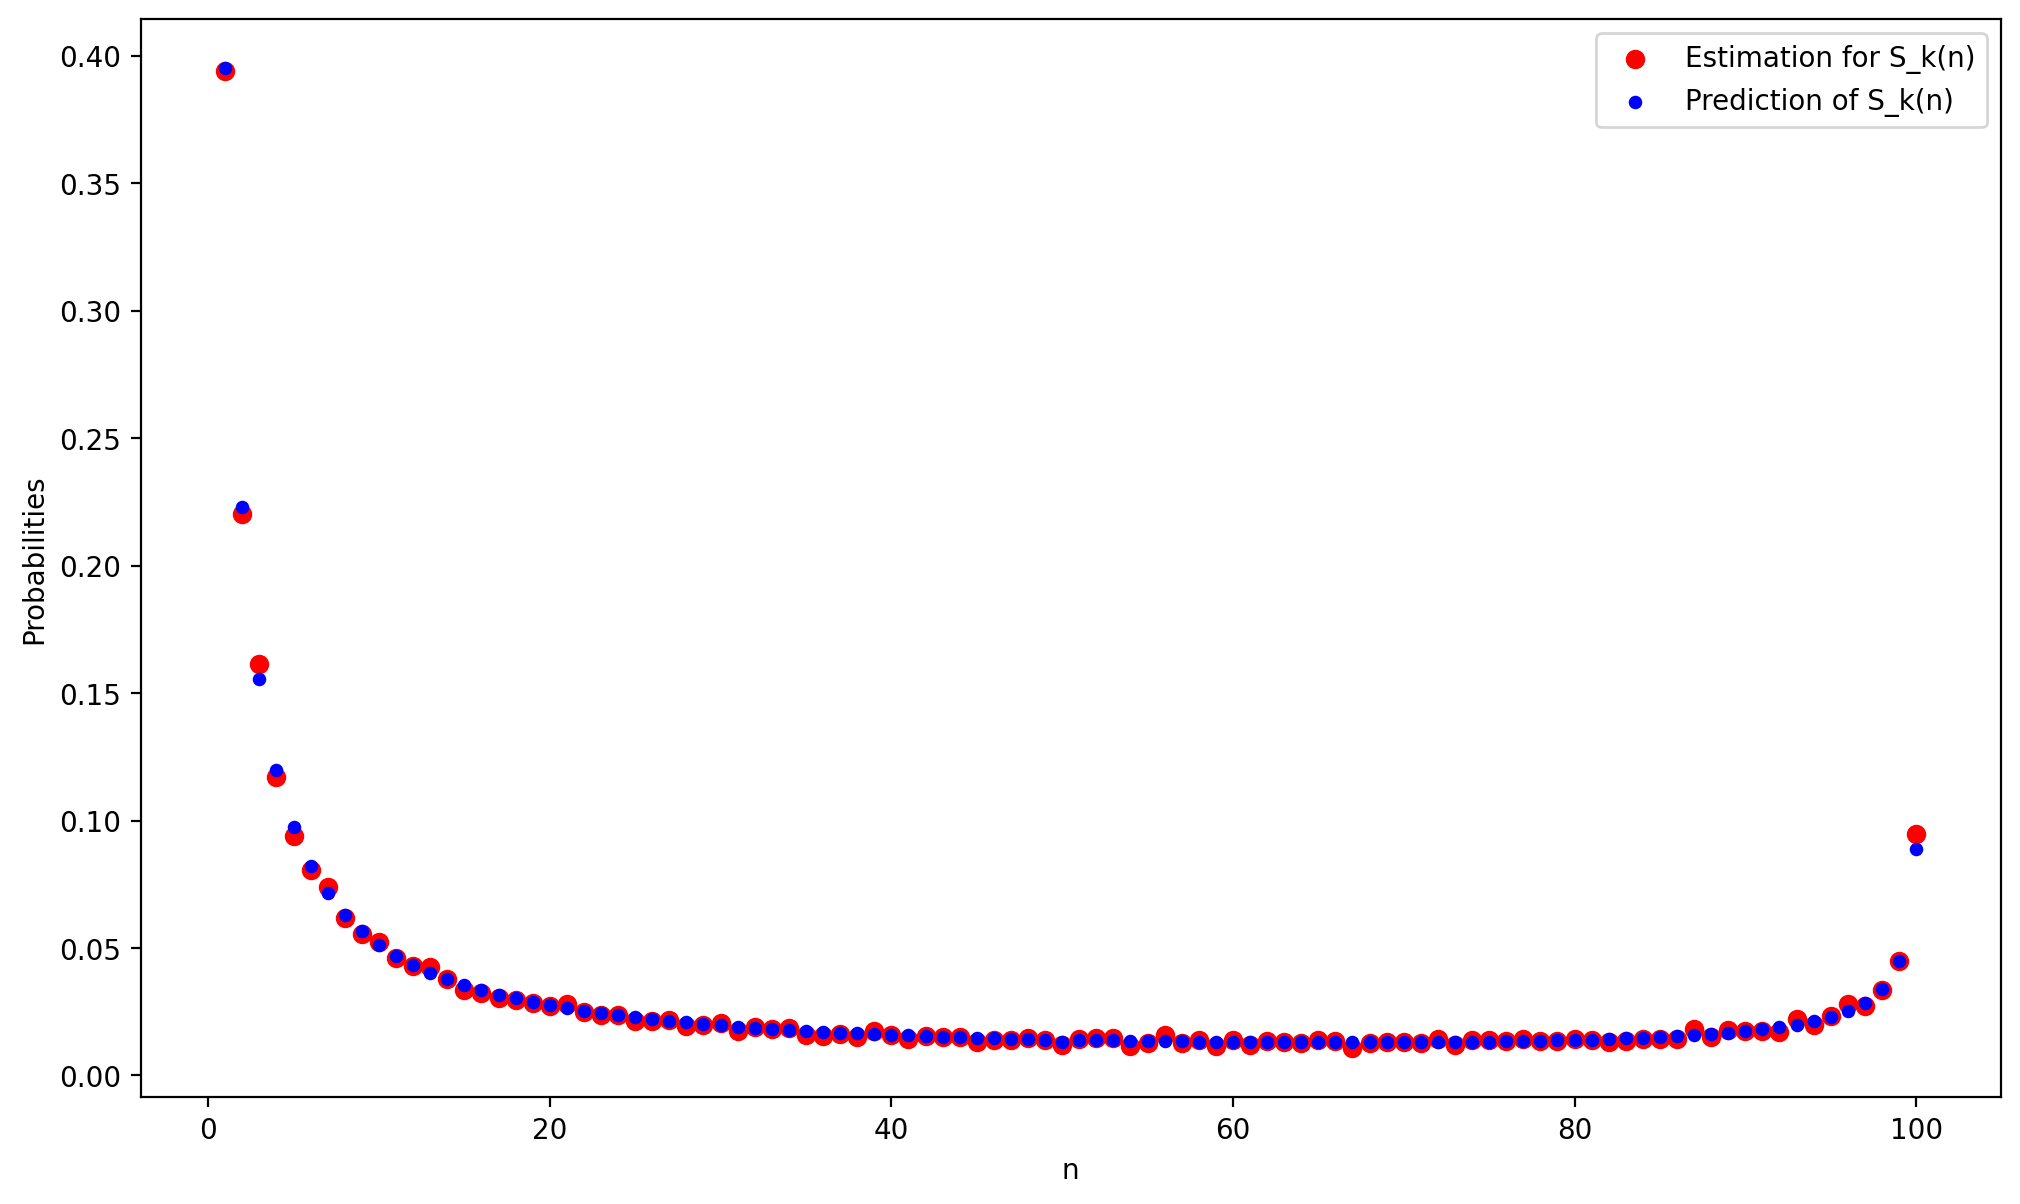

In [10]:
#Final prediction

def S(k,n):
    s=0
    for j in range(1,k//n+1):
        s+=(-1)**(j+1)*2**(2*n*j-j)*binom(2*k-2*n*j,k-n*j)/(n**j*f(j))
    return s/(binom(2*k,k))

def probofgettingloopsnewpredfull(n,reps=1000): #Probability of there being at least one loop of length n
    totals=[0 for i in range(n+1)]
    pred=[S(n,i) for i in range(1,n+1)]
    for i in range(reps):
        loops=stringsgame(n)
        looplens=set([len(loop) for loop in loops]) #get loop lengths without repeats
        for l in looplens:
            totals[l//2]+=1/reps
    plt.scatter(list(range(n+1)[1:]),totals[1:],color='r')
    plt.scatter(list(range(1,n+1)),pred,color='b',s=15)
    plt.legend(['Estimation for S_k(n)','Prediction of S_k(n)'])
    plt.xlabel('n')
    plt.ylabel('Probabilities')
    plt.show()

probofgettingloopsnewpredfull(100,10000)

In [7]:
#Graph to show as k tends to infinity
from math import exp

def showasympt(n,kupto=1000,reps=1000): #Probability of there being at least one loop of length n
    kvals=list(range(n,kupto+1))
    totals=[]
    for j in kvals:
        tot=0
        for i in range(reps):
            loops=stringsgame(j) # note that this is inefficient. In theory we can stop the game as soon as we find a loop of length n, but this is good enough
            try:
                for loop in loops:
                    if len(loop)==2*n:
                        tot+=1/reps
                        assert 0
            except:
                pass
        totals.append(tot)
    plt.scatter(kvals,totals,color='r')
    plt.legend(['Estimation for S_k(n)'])
    plt.xlabel('k')
    plt.ylabel('Probabilities')
    plt.axhline(y=1-exp(-0.5/n), color='blue', linestyle=':', label='Convergent at 1-e^(-1/2n)')
    plt.show()

showasympt(5) #This takes a long time to graph

In [5]:
#simulating a game with a general number of ends

#inputs are labelled pieces of strings and if it should print the final ties, eg [[0,1],[2,3],[4,5]] will look at 3 strings with 2 ends.
def generalstringgame(connectedends,shoulditprint=False): #won't look at string lengths, will only look at number of connected things at the end
    allends=[]
    for piece in connectedends:
        allends+=piece
    completepieces=0 # this will count the number of total pieces
    numofloops=0
    while allends:
        end1,end2=sample(allends,2)
        if shoulditprint:
            print(end1,end2)
        allends.remove(end1)
        allends.remove(end2)
        i=0
        try:
            while i<len(connectedends):
                piece = connectedends[i]
                if end1 in piece and end2 in piece:
                    numofloops+=1
                    piece.remove(end1)
                    piece.remove(end2)
                    if piece==[]:
                        connectedends.remove([])
                        completepieces+=1
                    assert 0
                if end1 in piece:
                    piece.remove(end1)
                    piece1=piece.copy()
                    connectedends.remove(piece1)
                    i-=1
                if end2 in piece:
                    piece.remove(end2)
                    piece2=piece.copy()
                    connectedends.remove(piece2)
                    i-=1
                i+=1
            if piece1+piece2:
                connectedends.append(piece1+piece2)
            else:
                completepieces+=1
        except:
            pass
    return completepieces,numofloops #Returns the number of pieces and the number of loops


In [19]:
#Testing a game with 4 pieces each with 3 ends.
generalstringgame([[0,1,2],[3,4,5],[6,7,8],[9,10,11]],1)

8 10
6 7
2 3
9 11
0 4
5 1


(2, 4)

In [20]:
#Testing a game with 100 pieces with 3 ends
generalstringgame([[3*i,3*i+1,3*i+2] for i in range(100)])

#This produces almost always one piece with 51 pieces!

(1, 51)

In [0]:
#Running 10000 trials to see our outcomes of #pieces and #loops
def countthem(kk,n):
    loopPiecePairs=set()
    count={} #counting how many in each scenario
    for i in range(10000):
        k=generalstringgame([[kk*ii+j for j in range(kk)] for ii in range(n)]) 
        loopPiecePairs.add(k)
        try:
            count[k]+=1
        except:
            count[k]=1
    return count
#countthem(4,100)

In [21]:
#Trying a selection of k strings each with a random number of edges.

from random import randint
def countthemrandom(k):
    j=0
    strings=[]
    for i in range(k):
        l=randint(2,7)
        newstring=[]
        for _ in range(l):
            newstring.append(j)
            j+=1
        strings.append(newstring)
    if j%2==1:
        strings[-1].append(j)
        j+=1
    print(strings)
    print('predicted difference: ',j//2-k)
    count={} #counting how many in each scenario
    for i in range(10000):
        k=generalstringgame([[num for num in string] for string in strings]) # play game on a copy of strings
        try:
            count[k]+=1
        except:
            count[k]=1
    print(count)

countthemrandom(5)

[[0, 1], [2, 3, 4, 5, 6, 7], [8, 9, 10, 11, 12], [13, 14, 15], [16, 17, 18, 19, 20, 21]]
predicted difference:  6


{(1, 7): 9456, (2, 8): 542, (3, 9): 2}


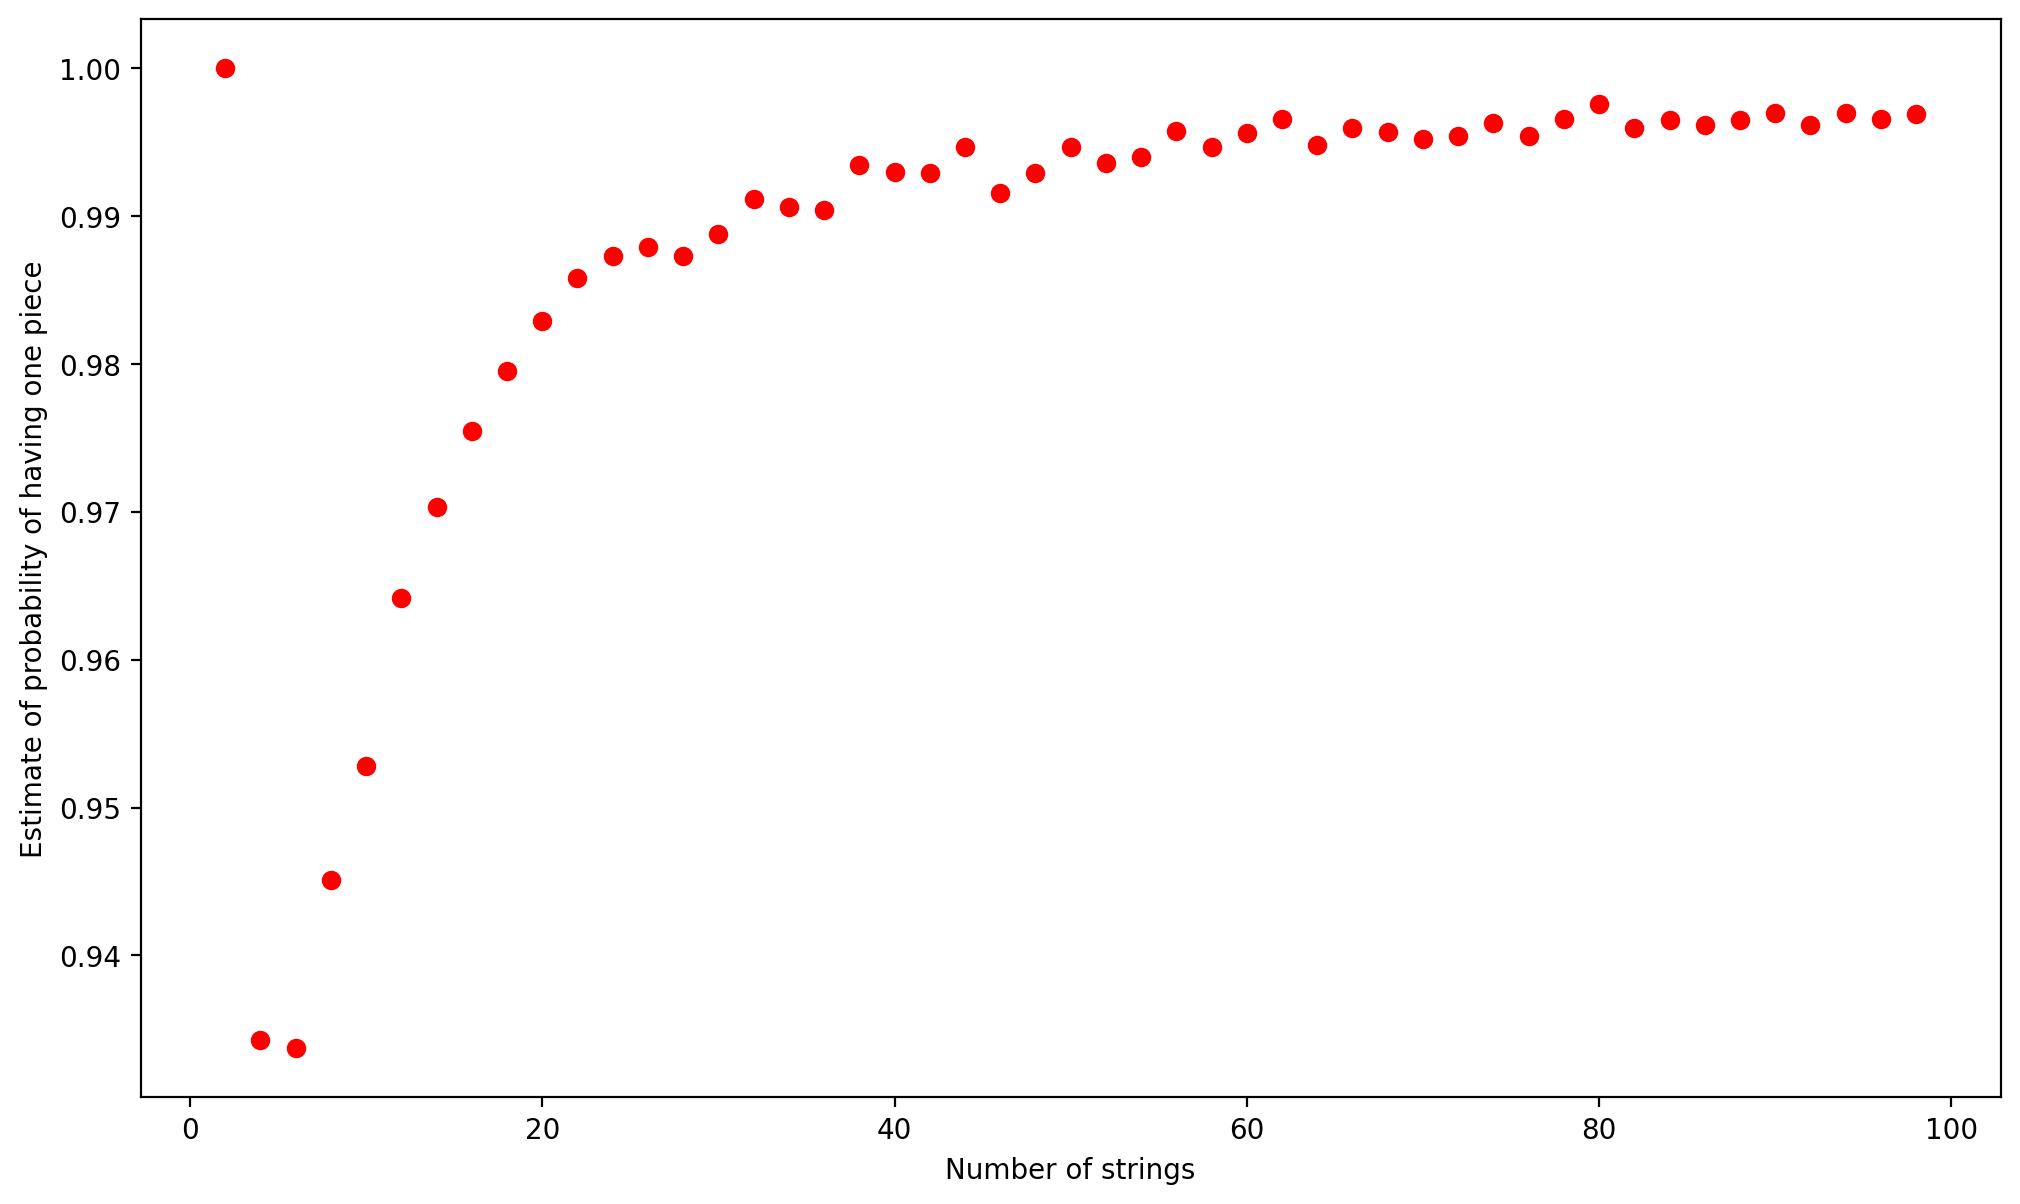

In [6]:
#Scatter graph showing the probability of having only one piece as we increase the number of strings, this takes a long time 

ns=[2*i for i in range(1,50)]
Ps=[0 for i in range(1,50)]
for n in ns:
    for i in range(10001):
        if generalstringgame([[3*i,3*i+1,3*i+2] for i in range(n)])[0]==1:
            Ps[(n-1)//2]+=1/10001
plt.scatter(ns,Ps,color = 'r')
plt.xlabel('Number of strings')
plt.ylabel('Estimate of probability of having one piece')
plt.show()